In [330]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [331]:
# Membaca dataset dari file CSV
df = pd.read_csv('book2.csv', delimiter=';')

# Mengubah format tanggal menjadi datetime
df['Tanggal Pembelian'] = pd.to_datetime(df['Tanggal Pembelian'], format= 'mixed')

# Membuat kolom 'Month' untuk menyimpan bulan dari tanggal pembelian
df['Month'] = df['Tanggal Pembelian'].dt.month

# Menormalisasi kolom 'Inventaris' menggunakan MinMaxScaler
scaler = MinMaxScaler()
df['Inventaris'] = scaler.fit_transform(df['Inventaris'].values.reshape(-1, 1))

# Mengubah kategori item pembelian menjadi angka
df['Item Pembelian'] = pd.Categorical(df['Item Pembelian'])
df['Item Code'] = df['Item Pembelian'].cat.codes

In [332]:
print(df['Item Pembelian'])

0      telur
1     daging
2       ayam
3       susu
4        oil
       ...  
94    rempah
95      gula
96      cabe
97      ikan
98    sarden
Name: Item Pembelian, Length: 99, dtype: category
Categories (19, object): ['anggur', 'ayam', 'bayam', 'beras', ..., 'susu', 'telur', 'tomat', 'wortel']


In [333]:
print(df['Item Code'])

0     16
1      6
2      1
3     15
4     11
      ..
94    13
95     7
96     5
97     8
98    14
Name: Item Code, Length: 99, dtype: int8


In [334]:
print(df['Month'])

0      1
1      1
2      1
3      1
4      1
      ..
94    10
95    10
96    10
97    10
98    10
Name: Month, Length: 99, dtype: int32


In [335]:
# Membagi dataset menjadi data latih dan data uji
train_size = int(0.8 * len(df))
train_features = features[:train_size]
train_target = target[:train_size]
test_features = features[train_size:]
test_target = target[train_size:]

In [336]:
# Membuat model sequential menggunakan TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[2,]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Mengompilasi model dengan optimizer dan loss function yang sesuai
# Mengompilasi model dengan optimizer, loss function, dan metrik MAE
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

In [337]:
# Menentukan fitur (bulan) dan target (jumlah inventaris) dari dataset
features = df[['Item Code','Month']]
target = df['Inventaris']

# Melatih model dengan dataset yang ada
history=model.fit(features, target, epochs=100, batch_size=33)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 2.5142 - mae: 2.5142
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 2.0393 - mae: 2.0393
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6131 - mae: 1.6131
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.2621 - mae: 1.2621
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.9810 - mae: 0.9810
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.8133 - mae: 0.8133
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6626 - mae: 0.6626
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6258 - mae: 0.6258
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6206 - mae: 0.6206
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 0.5684 - mae: 0.5684
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 0.4766 

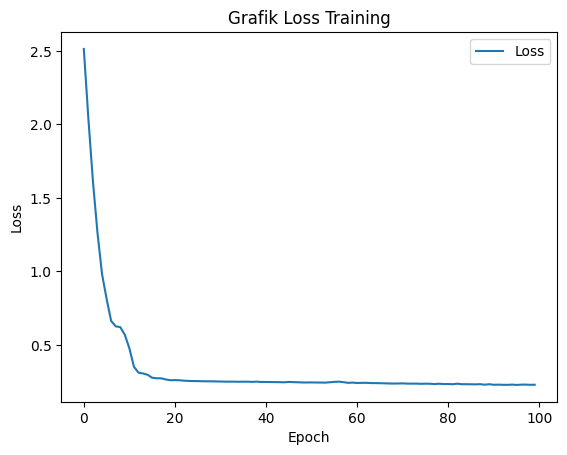

In [338]:
import matplotlib.pyplot as plt

# Mendapatkan data loss dan MAE dari objek history
loss = history.history['loss']
mae = history.history['mae']

# Membuat plot loss
plt.plot(loss, label='Loss')
plt.title('Grafik Loss Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


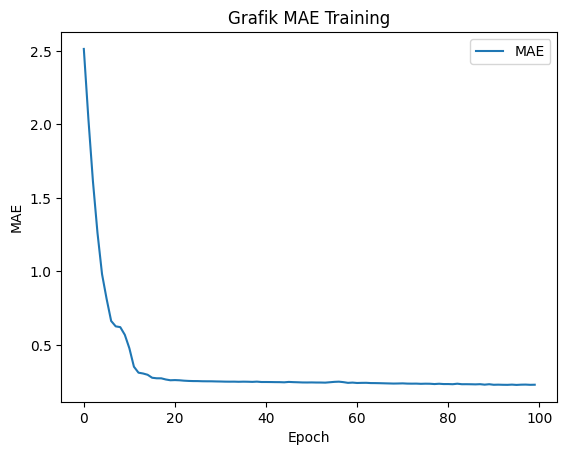

In [339]:
# Membuat plot MAE
plt.plot(mae, label='MAE')
plt.title('Grafik MAE Training')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [340]:
# Mengambil data validasi
features_val = df['Month'][:10]  # Contoh: Menggunakan 10 data pertama sebagai data validasi
target_val = df['Inventaris'][:10]  # Contoh: Menggunakan 10 data pertama sebagai data validasi

# Melakukan prediksi menggunakan data validasi
predictions = model.predict(features_val)


# Menampilkan hasil evaluasi model
evaluation = model.evaluate(features_val, target_val)
print("Hasil evaluasi model:")
print(f"Loss: {evaluation[0]}")
print(f"RMSE: {evaluation[1]}")

# Membuat plot prediksi vs target
plt.scatter(features_val, target_val, color='blue', label='Target')
plt.scatter(features_val, predictions, color='red', label='Prediksi')
plt.title('Prediksi vs Target')
plt.xlabel('Month')
plt.ylabel('Inventaris')
plt.legend()
plt.show()


ValueError: in user code:

    File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_31' (type Sequential).
    
    Input 0 of layer "dense_93" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_31' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=False
      • mask=None


In [ ]:
# Menggunakan model untuk memberikan rekomendasi pada tanggal tertentu
tanggal_tertentu = pd.to_datetime('2022-10-30', format='%Y-%m-%d')
bulan_tertentu = tanggal_tertentu.month

# Menggunakan model untuk memprediksi jumlah inventaris pada bulan tertentu
prediksi_inventaris = model.predict(np.array([bulan_tertentu]).reshape(-1, 1))


# Mencetak rekomendasi item apa yang dibeli dan jumlahnya pada bulan tertentu
rekomendasi_index = prediksi_inventaris.argmax()
rekomendasi_item = df['Item Pembelian'].cat.categories[rekomendasi_index]
rekomendasi_jumlah = int(prediksi_inventaris[rekomendasi_index])
print(f"Rekomendasi untuk bulan {tanggal_tertentu.strftime('%B %Y')}:")
print(f"Item Pembelian: {rekomendasi_item}")
print(f"Jumlah: {rekomendasi_jumlah}")
